In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, mean_squared_error, r2_score,mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV
import os
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor, IsolationForest
from sklearn.preprocessing import MinMaxScaler ,RobustScaler, StandardScaler

 

df = pd.read_csv("..\\Dataset\\reccomender.csv")
x = df[['age','weight(kg)','height(m)','gender','BMI','BMR','activity_level']]
y = df.calories
print("x: \n", x.count(), end="\n\n")
print("y: \n", y.count(), end="\n\n")

x: 
 age               10726
weight(kg)        10726
height(m)         10726
gender            10726
BMI               10726
BMR               10726
activity_level    10726
dtype: int64

y: 
 10726



In [2]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = RobustScaler()

x_scaled = scaler.fit_transform(x)

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Suddivisione iniziale in set di addestramento + convalida e test
x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, test_size=0.3, shuffle=True, random_state=42)

# Ulteriore suddivisione del set di addestramento + convalida in set di addestramento e convalida
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, shuffle=True, random_state=42)


In [4]:

#model = RandomForestRegressor()
#model = AdaBoostRegressor()
#model = IsolationForest(contamination='auto')
model= ExtraTreesRegressor()
#model = GradientBoostingRegressor()

#Lo proveremo con il modello più performante
#model = BaggingRegressor(estimator=ExtraTreesRegressor()) 

model.fit(x_train, y_train)

n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [5]:
y_pred = model.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print("mse = ", mse)
print("r2 = ", r2)
print("mae = ", mae)

mse =  2.916498720201835
r2 =  0.9999795425832086
mae =  0.5641549181091949


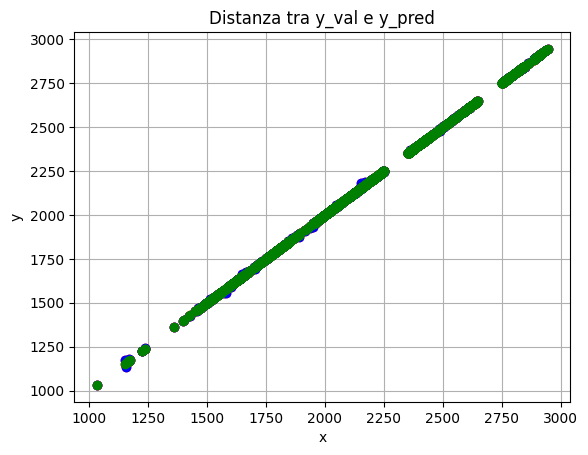

In [95]:
#distanza tra x_val e y_pred
plt.plot([y_val, y_val], [y_val, y_pred],'ro-', label='Distanza')
plt.plot(y_val, y_pred, 'bo', label='Valore predetto')
plt.plot(y_val, y_val, 'go', label='Valore di x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distanza tra y_val e y_pred')
plt.grid(True)
plt.show()


## GRID SEARCH

In [19]:
params = {'n_estimators': [500,700,720],
          'max_depth': [25,30,35],
          'min_samples_split':[2,3,4], 
          'min_samples_leaf':[1,2,3]}

clf_optimized = GridSearchCV(model,param_grid=params, cv=10,  n_jobs=n_cpu-1,refit=True,verbose=True)
clf_optimized.fit(x_train, y_train)
print("Migliori iperparametri:",clf_optimized.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Migliori iperparametri: {'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 720}


In [20]:
best_params = clf_optimized.best_params_
model.set_params(**best_params)
model.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=35, n_estimators=720)

In [21]:
# Calcolo delle previsioni cv10
y_pred = model.predict(x_test)

# Calcolo del MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("r2:", r2)
print("Mae:", mae)

Mean Squared Error: 1.7879791700564407
r2: 0.9999885946000565
Mae: 0.4298720853080573
